In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df_amazon = pd.read_csv('data/amz_uk_price_prediction_dataset.csv')
df_amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
#Part 1
display (df_amazon)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
df_amazon.describe().round()

,uid,stars,reviews,price,boughtInLastMonth
count,2443651.0,2443651.0,2443651.0,2443651.0,2443651.0
mean,1370545.0,2.0,481.0,89.0,26.0
std,816056.0,2.0,5944.0,346.0,240.0
min,1.0,0.0,0.0,0.0,0.0
25%,658922.0,0.0,0.0,10.0,0.0
50%,1349029.0,0.0,0.0,19.0,0.0
75%,2060686.0,4.0,59.0,46.0,0.0
max,2828593.0,5.0,1356658.0,100000.0,50000.0


In [6]:
frequency_table = df_amazon['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
top_5_categories = frequency_table.head(5)
display (top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

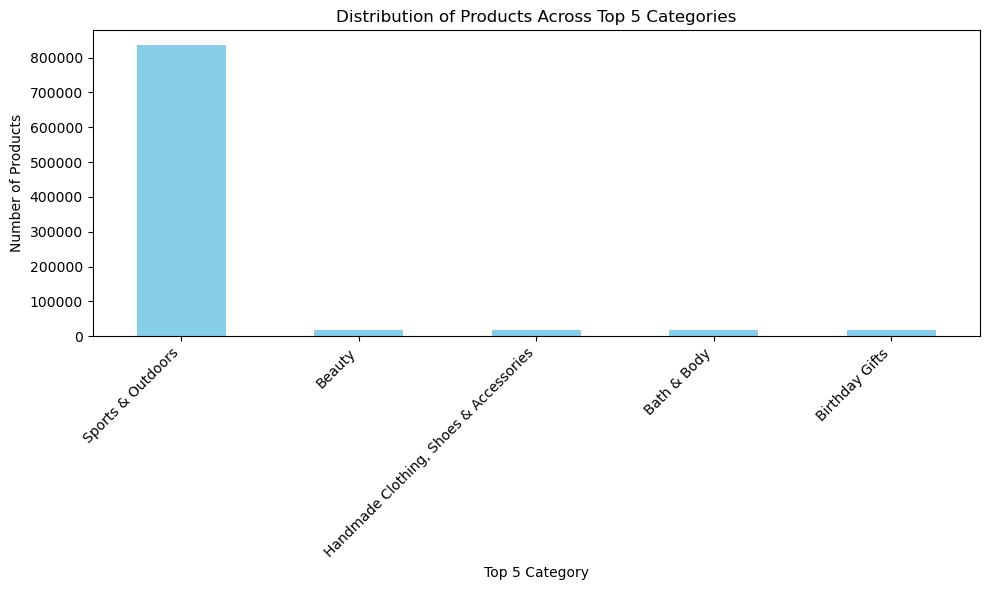

In [8]:
#2 Visualizations
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='skyblue')

plt.title('Distribution of Products Across Top 5 Categories')
plt.xlabel('Top 5 Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

In [9]:
proportion_table = df_amazon['category'].value_counts(normalize=True)
display (proportion_table)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

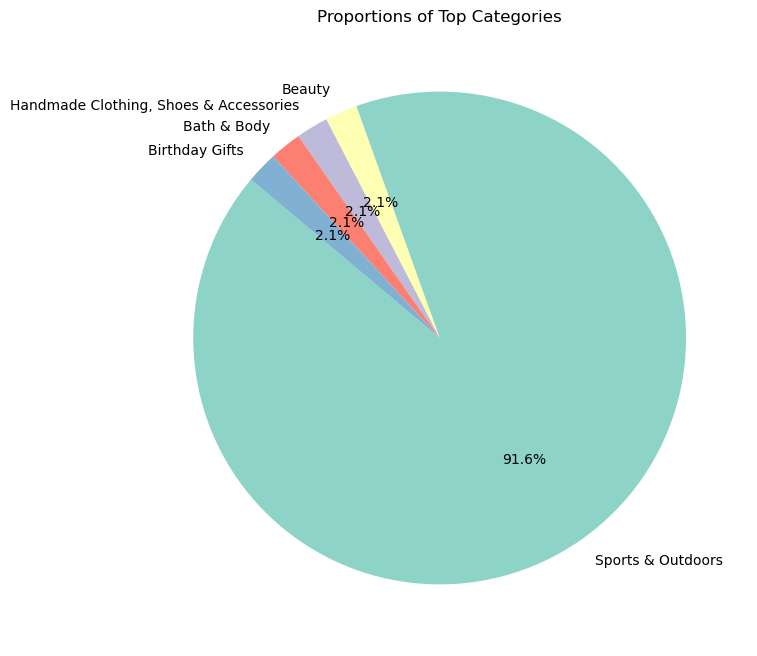

In [10]:
category_counts = df_amazon['category'].value_counts()

top_categories = category_counts.head(5)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors=plt.get_cmap('Set3').colors, startangle=140)

plt.title('Proportions of Top Categories')
plt.show()

# Insights
total_count = top_categories.sum()
dominant_category = top_categories.idxmax()
dominant_count = top_categories.max()

In [11]:
# Sports & Outdoors are the most popular category that has comprises of 92% of the market products


In [12]:
#Part 2
#1 Measures of Centrality:
df_amazon['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [13]:
df_amazon['price'].isnull().sum()

0

In [14]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [15]:
df_amazon['price'] = pd.to_numeric(df_amazon['price'], errors='coerce')
mean_price = df_amazon['price'].mean()
median_price = df_amazon['price'].median()
mode_price = df_amazon['price'].mode()

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price[0]:.2f}")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99


In [16]:
#The mean price ($89.24) is significantly higher than the mode price ($9.99).
#This discrepancy suggests that while $9.99 is the most common price, 
#there are likely many products listed at higher prices which are pulling the average price up.

In [17]:
#2. Measures of Dispersion

variance_price = df_amazon['price'].var()
std_dev_price = df_amazon['price'].std()

# range
price_range = df_amazon['price'].max() - df_amazon['price'].min()

# interquartile range (IQR)
Q1 = df_amazon['price'].quantile(0.25)
Q3 = df_amazon['price'].quantile(0.75)
iqr_price = Q3 - Q1


print(f"Variance of Price: {variance_price:.2f}")
print(f"Standard Deviation of Price: {std_dev_price:.2f}")
print(f"Range of Price: {price_range:.2f}")
print(f"Interquartile Range (IQR) of Price: {iqr_price:.2f}")

Variance of Price: 119445.49
Standard Deviation of Price: 345.61
Range of Price: 100000.00
Interquartile Range (IQR) of Price: 36.00


In [18]:
# There is a significant spread. Large variance and high standard deviation suggest that prices are widely spread out. 
# Range of price suggests that there is a significant difference between the cheapest and expensive products suggesting highly varied product offering
# IGR tells you the most products are in the in a narrow price band. However, there are some significant high range and low range outliers that are affecting the spead.

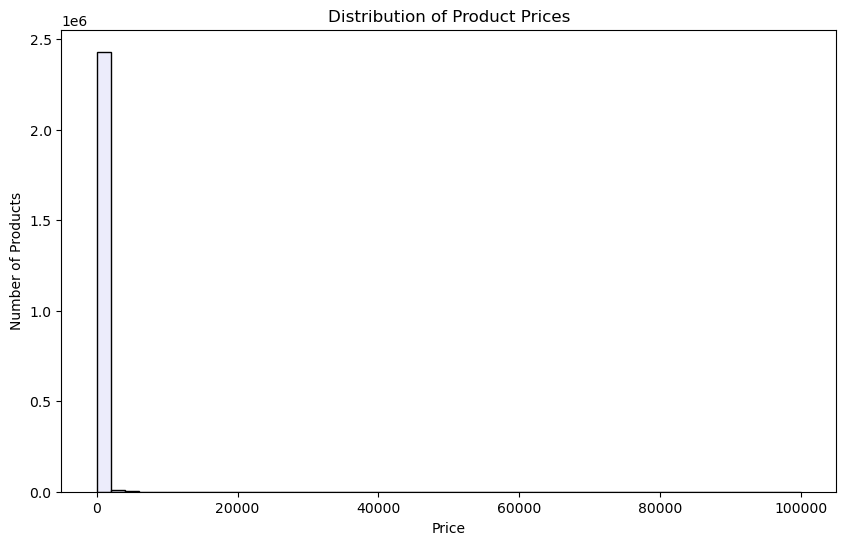

In [19]:
#3. Visualizations:
df_amazon['price'] = df_amazon['price'].fillna(0).astype(int).round()

plt.figure(figsize=(10, 6))
sns.histplot(df_amazon['price'], bins=50, kde=False, color='lavender')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')


plt.show()

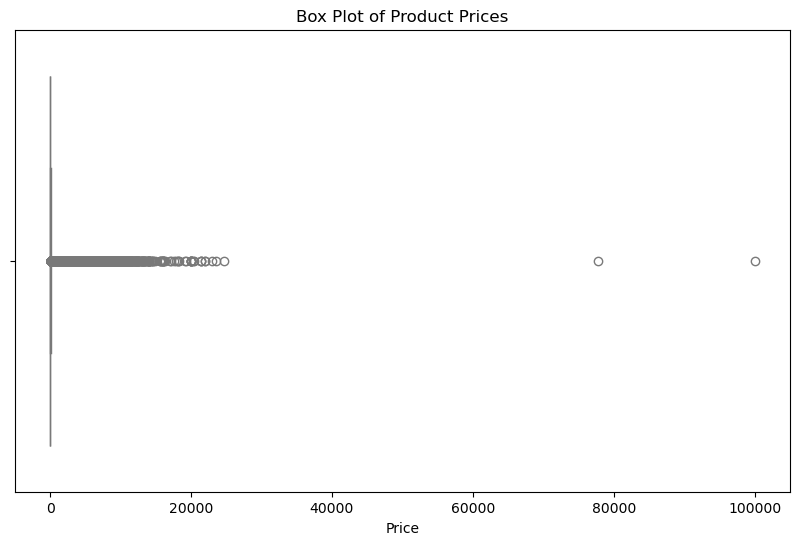

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_amazon['price'], color='lightblue')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

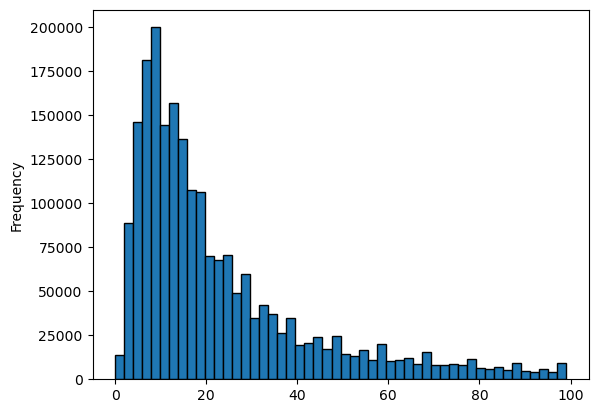

In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_amazon['price'].quantile(0.25)
Q3 = df_amazon['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df_amazon = df_amazon[(df_amazon['price'] >= lower_bound) & (df_amazon['price'] <= upper_bound)]

# Plot the histogram
filtered_df_amazon['price'].plot(kind='hist', bins=50, edgecolor='black')

import matplotlib.pyplot as plt
plt.show()

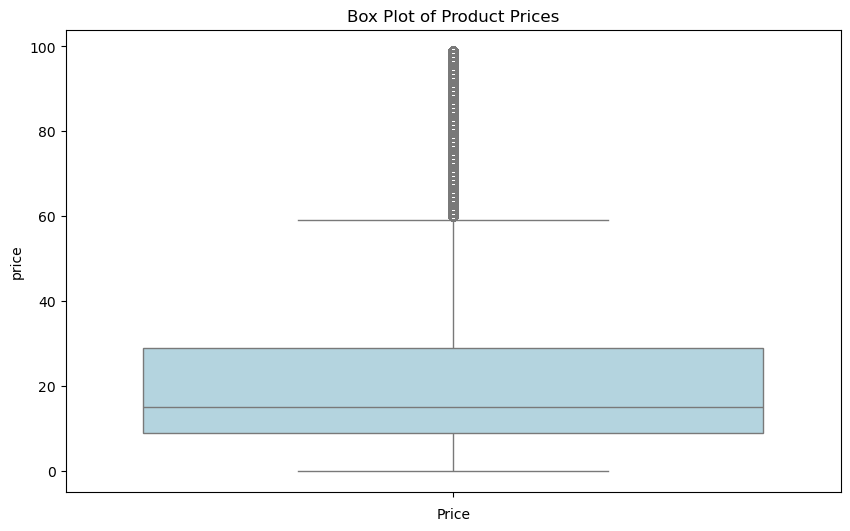

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=filtered_df_amazon['price'], color='lightblue')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

In [23]:
#Part 3: Unpacking Product Rankings
#1. Calculate the mean, median, and mode for the rating of products.
product_ratings = df_amazon['stars'].agg(['mean', 'median', 'std'])
product_ratings

mean      2.152836
median    0.000000
std       2.194865
Name: stars, dtype: float64

In [24]:
#The most notable trend is that the majority of the ratings are very low or zero (as indicated by the median of 0).
#Despite ratings being low, there are some high ratings that increase the mean. 
#customers generally rate products quite low, with a trend towards very low ratings being common.

In [28]:
# 2. Measures of Dispersion
variance_ratings = df_amazon['stars'].var()
std_dev_ratings = df_amazon['stars'].std()
min_ratings = df_amazon['stars'].min()
max_ratings = df_amazon['stars'].max()
range_ratings = max_price - min_price
quantiles_ratings = df_amazon['stars'].quantile([0.25, 0.5, 0.75])

variance_ratings, std_dev_ratings, min_ratings, max_ratings, range_ratings, quantiles_ratings

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [ ]:
# Variance = 4.82 Std Dev : 2.19 --- there is a large variance from the mean
# 25% qaurtile: ratings are 0 or lower
# 75% quartile: ratings are 4.4 or lower
# high variation and lack of consitency in the responses

In [30]:
# 3. Shape of Distribution
skewness_ratings = df_amazon['stars'].skew()
kurtosis_ratings = df_amazon['stars'].kurtosis()

skewness_ratings, kurtosis_ratings

(0.08120735761080985, -1.9260061280432985)

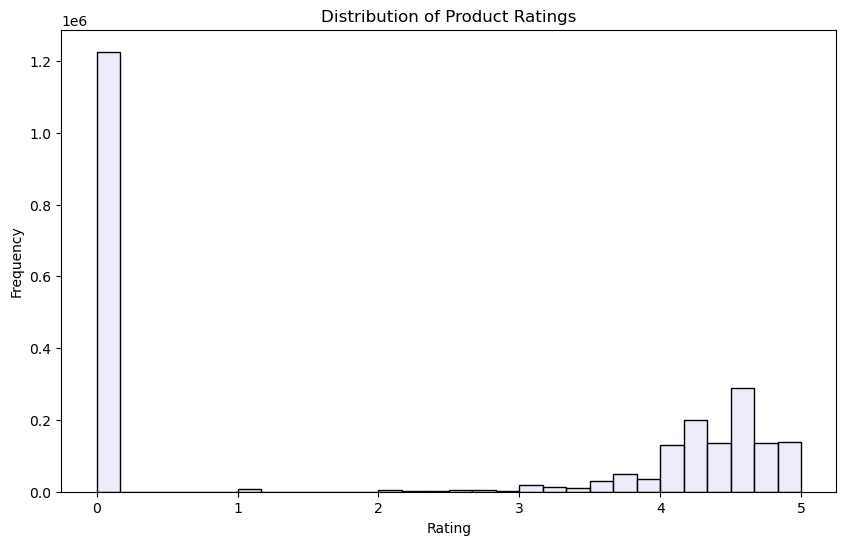

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df_amazon['stars'], bins=30, kde=False, color='lavender', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')

plt.show()

In [ ]:
# 0 is the most common rating.